<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-файла" data-toc-modified-id="Изучение-файла-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Проверка-моделей-на-несбалансированной-таблице" data-toc-modified-id="Проверка-моделей-на-несбалансированной-таблице-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка моделей на несбалансированной таблице</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Проверка-модели-после-масштабирования-признаков" data-toc-modified-id="Проверка-модели-после-масштабирования-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка модели после масштабирования признаков</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

In [1]:
pip install jupyterthemes

Note: you may need to restart the kernel to use updated packages.


In [2]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [3]:
!jt -t solarizedl -T -N -kl

## Подготовка данных

### Изучение файла

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler


In [5]:
pd.options.mode.chained_assignment = None

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все импорты в одном месте, удобно :)</div>

In [6]:
data = pd.read_csv('/datasets/Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


**Признаки**
RowNumber — индекс строки в данных
CustomerId — уникальный идентификатор клиента
Surname — фамилия
CreditScore — кредитный рейтинг
Geography — страна проживания
Gender — пол
Age — возраст
Tenure — сколько лет человек является клиентом банка
Balance — баланс на счёте
NumOfProducts — количество продуктов банка, используемых клиентом
HasCrCard — наличие кредитной карты
IsActiveMember — активность клиента
EstimatedSalary — предполагаемая зарплата
**Целевой признак**
Exited — факт ухода клиента



In [8]:
data.duplicated().sum()

0

In [9]:
print(f'Таблица представляет собой массив из {data.shape[1]} столбцов и {data.shape[0]} строк')
print("")
gap_columns = []
for column in data.columns:
    if data[column].count() < data.shape[0]:
        gap_columns.append(column)
        
print(f'Таблица содержит пропуски в столбцах {gap_columns}. Пропуски в {len(gap_columns)} столбцах из {data.shape[1]}')

full_columns = []
for column in data.columns:
    if data[column].count() == data.shape[0]:
        full_columns.append(column)
print("")
print(f'Полностью заполнены и не содержат пропусков столбцы {full_columns}, всего {len(full_columns)} полностью заполненных столбцов')

Таблица представляет собой массив из 14 столбцов и 10000 строк

Таблица содержит пропуски в столбцах ['Tenure']. Пропуски в 1 столбцах из 14

Полностью заполнены и не содержат пропусков столбцы ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'], всего 13 полностью заполненных столбцов


In [10]:
def gaps(datafile):
    gap_columns = []
    for column in datafile.columns:
        if datafile[column].count() < datafile.shape[0]:
            gap_columns.append(column)
    
    full_columns = []
    for column in datafile.columns:
        if datafile[column].count() == datafile.shape[0]:
            full_columns.append(column)
    gaps_text = ('Таблица представляет собой массив из ' + str(datafile.shape[1]) 
                 + ' столбцов и '+ str(datafile.shape[0]) + ' строк. ' +
                'Таблица содержит пропуски в столбцах ' + str(gap_columns) + '. Пропуски в ' + str(len(gap_columns)) + ' столбцах из ' + str(datafile.shape[1])
                 +'. Полностью заполнены и не содержат пропусков столбцы ' + str(full_columns) 
                 + ', всего ' + str(len(full_columns)) + ' полностью заполненных столбцов.')
    return gaps_text

print(gaps(data))

Таблица представляет собой массив из 14 столбцов и 10000 строк. Таблица содержит пропуски в столбцах ['Tenure']. Пропуски в 1 столбцах из 14. Полностью заполнены и не содержат пропусков столбцы ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'], всего 13 полностью заполненных столбцов.


Таблица data содержит пропуски в столбце Tenure - число лет сотрудничества с банком.
Явных дубликатов нет. 
Наименования столбцов имеют неприемлемый вид: сочетание строчных и прописных букв,не "змеиный" стиль,но хотя бы соотносятся с информацией в столбцах по смыслу.

Данные в столбцах 'HasCrCard', 'IsActiveMember','Exited' - int64, на 
самом деле - это тип 'bool', но этот тип менять не будем, чтобы не перемудрить.


Проверим столбец с географией для поиска скрытых дубликатов:

In [11]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Нет, здесь всё ок.

In [12]:
data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

<AxesSubplot:>

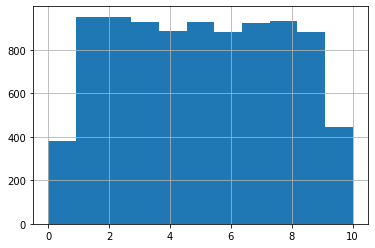

In [13]:
data['Tenure'].hist(bins = 11)

Оставим здесь график, чтобы сравнить с ситуацией после заполнения пропусков.

Данные в столбце 'Tenure' -non-null float64 являются на самом деле целыми, а не вещественными числами.

In [14]:
#sns.pairplot(data, hue="Exited")

In [15]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Признаков мультиколлинеарности не выявлено, показатели берем в полном объеме.

In [16]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Есть слабая обратная корреляция с числом продуктов, оно и понятно - чем больше яиц в корзине, тем сложнее переносить. Изучаем дальше.

**Вывод** Таблица data содержит пропуски в одном столбце Tenure - число лет сотрудничества с банком. Остальные 13 без пропусков.
Явных дубликатов нет. 
Наименования столбцов имеют неприемлемый вид: сочетание строчных и прописных букв,не "змеиный" стиль,но соотносятся с информацией в столбцах по смыслу.
Данные в столбцах 'HasCrCard', 'IsActiveMember','Exited' - int64, на 
самом деле - это тип 'bool'.
Данные в столбце 'Tenure' -non-null float64 являются целыми числами.

### Предобработка данных

Приведем наименования столбцов к приемлемому виду.

In [17]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [19]:
data = (data.rename(columns={'RowNumber': 'row_number', 'CustomerId': 'customer_id', 
        'Surname': 'surname', 'CreditScore': 'credit_score', 'Geography':'geography', 
        'Gender':'gender','Age':'age', 'Tenure':'tenure', 'Balance':'balance', 
        'NumOfProducts':'num_of_products', 'HasCrCard':'has_cr_card',
        'IsActiveMember':'is_active_member', 'EstimatedSalary':'estimated_salary',
        'Exited':'exited' }))

Проверим результат

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Получилось, теперь выбросим столбцы, которые нам не пригодятся при анализе. row_number — индекс строки (у нас есть собственная индексация), CustomerId — уникальный идентификатор клиента (вряд ли клиенты с четными номерами лояльнее, чем с нечетными, но на досуге можно проверить. Все, что касается имени - конечно, есть теории про имена, тогда и астрологию, и, глядишь, расовые различия нужно анализировать, а данные не предоставлены. В общем, ненаучную часть отбрасываем -  у нас data science.

In [22]:
data = data.drop(['row_number', 'customer_id', 'surname'], axis=1)

приступаем к заполнению пропусков.

In [23]:
data['tenure'].value_counts().sum()

9091

In [24]:
data['tenure'].isna().sum()

909

Девять процентов не заполнено, следовало бы обратиться к составителю таблицы и запросить исправленную версию, но у нас такой возможности нет.

Попробуем поискать корреляции:

In [25]:
data['tenure'].corr(data['age'])

-0.01313438493079654

In [26]:
data['tenure'].corr(data['balance'])

-0.007910697992078478

In [27]:
data['tenure'].corr(data['num_of_products'])

0.011978980549193175

In [28]:
data['tenure'].corr(data['is_active_member'])

-0.032178352177855286

In [29]:
data['tenure'].corr(data['is_active_member'])

-0.032178352177855286

Да, среди однофакторных корреляций сильных связей нет. А что у нас с возрастом клиентов?

In [30]:
data['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

От 18 до 92, медианное значение - 37. Инересно, а в 18 лет клиент может иметь значение больше 1?

In [31]:
data[data['age']==18]['tenure'].value_counts()

2.0     4
7.0     3
8.0     2
10.0    2
3.0     2
4.0     2
1.0     2
6.0     1
5.0     1
9.0     1
Name: tenure, dtype: int64

In [32]:
data[data['age']==18]['tenure'].value_counts().median()

2.0

Моё предположение, что в 18 всё только начинается неверно, возможно, законодательные различия. Медианное значение - 2. Что же, тогда заполним пропуски медианой значений соответствующего возраста с разбивкой по странам.

In [33]:
data['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [34]:
data['has_cr_card'].value_counts()

1    7055
0    2945
Name: has_cr_card, dtype: int64

In [35]:
#data[data['geography'] == 'France' | data['has_cr_card'] == '0' ].fillna(data.groupby(['has_cr_card','age'])['tenure'].transform('median'))
#data.loc[(data['geography'] == 'France')&(data['has_cr_card'] == 0), 'tenure'] = data.groupby(['has_cr_card'])['tenure'].transform('median')
data['tenure'] = data['tenure'].fillna(data.groupby(['geography','age'])['tenure'].transform('median'))
data['tenure'].isna().sum()

0

<AxesSubplot:>

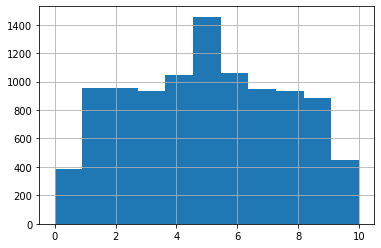

In [36]:
data['tenure'].hist(bins = 11)

In [37]:
encoder = OrdinalEncoder()
data_ordinal = data.dropna()
data_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 937.5+ KB


In [38]:
data_ordinal['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [39]:

data_ordinal = pd.DataFrame(encoder.fit_transform(data_ordinal), columns=data_ordinal.columns)


In [40]:
data_ordinal.groupby('is_active_member')['tenure'].corr(data_ordinal['age'])

is_active_member
0.0   -0.015673
1.0   -0.017166
Name: tenure, dtype: float64

In [41]:
data_ordinal.groupby('has_cr_card')['tenure'].corr(data_ordinal['age'])

has_cr_card
0.0   -0.027598
1.0   -0.014852
Name: tenure, dtype: float64

In [42]:
data_ordinal[data_ordinal['geography'] == 0.0].groupby('has_cr_card')['tenure'].corr(data_ordinal['age'])

has_cr_card
0.0   -0.031748
1.0   -0.000840
Name: tenure, dtype: float64

In [43]:
data_ordinal.groupby('geography')['tenure'].corr(data_ordinal['age'])

geography
0.0   -0.010422
1.0    0.010147
2.0   -0.064859
Name: tenure, dtype: float64

In [44]:
data_ordinal['geography'].value_counts()

0.0    5014
1.0    2509
2.0    2477
Name: geography, dtype: int64

Так как у нас есть категориальные переменные, выраженные строковыми значениями - подготовим таблицу методом прямого кодирования (OHE), метод порядкового кодирования не используем, так как планируем применять модель логистической регрессии.

In [45]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [46]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  float64
 3   balance            10000 non-null  float64
 4   num_of_products    10000 non-null  int64  
 5   has_cr_card        10000 non-null  int64  
 6   is_active_member   10000 non-null  int64  
 7   estimated_salary   10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_Germany  10000 non-null  uint8  
 10  geography_Spain    10000 non-null  uint8  
 11  gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


Наша география превратилась в 3 столбца, а гендер - в один, мужской (надеюсь, нашу таблицу не увидят представители LGBTQIA+)

**Вывод** Произведено переименование столбцов и заполнение пропусков в столбце tenure медианой по возрасту, в разбивке по странам. Применен метод прямого кодирования (OHE)

In [47]:
data_ohe['geography_Germany'] = data_ohe['geography_Germany'].astype('Int64')
data_ohe['geography_Spain'] = data_ohe['geography_Spain'].astype('Int64')
data_ohe['gender_Male'] = data_ohe['gender_Male'].astype('Int64')
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  float64
 3   balance            10000 non-null  float64
 4   num_of_products    10000 non-null  int64  
 5   has_cr_card        10000 non-null  int64  
 6   is_active_member   10000 non-null  int64  
 7   estimated_salary   10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_Germany  10000 non-null  Int64  
 10  geography_Spain    10000 non-null  Int64  
 11  gender_Male        10000 non-null  Int64  
dtypes: Int64(3), float64(3), int64(6)
memory usage: 966.9 KB


In [48]:
#data_ohe.corr()

Заполнено, начинаем исследовательский анализ.

## Исследование задачи

### Проверка моделей на несбалансированной таблице

Разделим исходные данные на обучающую, валидационную и тестовую выборки. Так как мы применяем обучение с учителем, извлечем признаки и выделим целевой признак отдельно:

In [49]:
RANDOM_ST = 12345

In [50]:
features = data_ohe.drop(['exited'], axis=1) # извлекаем признаки 

In [51]:
target = data_ohe['exited'] # извлекаем целевой признак

Хорошо бы взглянуть на предсказания по "сырой" таблице

Разделим исходные данные. Так как у нас нет спрятанной тестовой выборки, данные разобьём на три части: обучающую, валидационную и тестовую в соотношении 3:1:1. Разделим за 2 шага, на первом выделим обучающую часть, отделим 40% "на потом":

In [52]:
features_train, features_preliminary, target_train, target_preliminary = train_test_split(
    features, target, test_size=0.4, random_state=RANDOM_ST, stratify=target)

Делим 40% пополам:

In [53]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_preliminary, target_preliminary, test_size=0.5, random_state=RANDOM_ST, stratify=target_preliminary)

features_train.info()

In [54]:
features_train.shape[0]

6000

In [55]:
features_train.shape[0]/(features_train.shape[0]+features_valid.shape[0]+features_test.shape[0])

0.6

In [56]:
features_valid.shape[0]

2000

In [57]:
features_valid.shape[0]/(features_train.shape[0]+features_valid.shape[0]+features_test.shape[0])

0.2

In [58]:
features_test.shape[0]

2000

In [59]:
features_test.shape[0]/(features_train.shape[0]+features_valid.shape[0]+features_test.shape[0])

0.2

Идеальные проценты, метод справился.

**Вывод** Данные подготовлены к прогону в моделях.

#### Дерево решений

In [60]:
model = DecisionTreeClassifier(random_state=RANDOM_ST)
model.fit(features_train, target_train)

best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 6): 
    model = DecisionTreeClassifier(random_state=RANDOM_ST, max_depth=depth ) # < создаем модель, указав max_depth=depth 
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid) # < находим предсказания на валидационной выборке 
    print("max_depth =", depth, ": ", end='')
    print(f1_score(target_valid, predicted_valid))
    result = f1_score(target_valid, predicted_valid) # считаем значение метрики F1 на валидационной выборке
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth    
print("")
print('Лучшая модель после шага 1:', best_model, "F1 наилучшей модели на валидационной выборке:", best_result, "Максимальная глубина:", best_depth)

max_depth = 1 : 0.0
max_depth = 2 : 0.5203488372093023
max_depth = 3 : 0.5375722543352601
max_depth = 4 : 0.5206349206349208
max_depth = 5 : 0.5454545454545455

Лучшая модель после шага 1: DecisionTreeClassifier(max_depth=5, random_state=12345) F1 наилучшей модели на валидационной выборке: 0.5454545454545455 Максимальная глубина: 5


In [61]:
model = DecisionTreeClassifier(random_state=RANDOM_ST, max_depth=5 ) # < создаем модель, указав max_depth=depth 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

In [62]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 


0.849793544930535


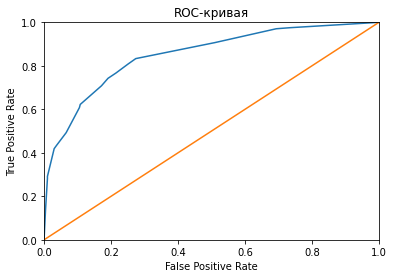

In [63]:
plt.figure()
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
x = np.array([0, 1])
y = np.array([0, 1])
plt.plot(x, y)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()

#### Случайный лес

Для быстроты проверки я сокращаю цикл, подбор параметров производился на большем диапазоне: est in range(10, 401, 10), depth in range (1, 15). Полученный результат F1 наилучшей модели на валидационной выборке: 0.6275659824046922 Количество деревьев: 200 Максимальная глубина: 18
Возьмем близкий диапазон:

In [64]:
best_model_f = None
best_result_f = 0
best_est_f = 0
best_depth_f = 0
for est in range(180, 201, 10):
    for depth in range (17, 19):
        model = RandomForestClassifier(random_state=RANDOM_ST, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train) 
        predicted_valid = model.predict(features_valid)
        result_f = f1_score(target_valid, predicted_valid) # считаем значение метрики F1 на валидационной выборке
        if result_f > best_result_f:
            best_model_f = model
            best_result_f = result_f
            best_est_f = est
            best_depth_f = depth

print("F1 наилучшей модели на валидационной выборке:", best_result_f, "Количество деревьев:", best_est_f, "Максимальная глубина:", best_depth_f)


F1 наилучшей модели на валидационной выборке: 0.6275659824046922 Количество деревьев: 200 Максимальная глубина: 18


In [65]:
model = RandomForestClassifier(random_state=RANDOM_ST, n_estimators=200, max_depth=18) 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

In [66]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

0.8661698504778796


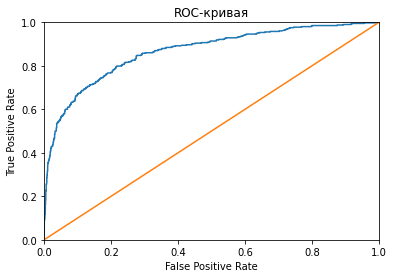

In [67]:
plt.figure()
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
x = np.array([0, 1])
y = np.array([0, 1])
plt.plot(x, y)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()

#### Логистическая регрессия

In [68]:
model_lr = LogisticRegression(random_state=RANDOM_ST, solver='liblinear', max_iter=1000)
model_lr.fit(features_train, target_train)
predicted_valid = model_lr.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.06263982102908278

In [69]:
probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

0.6986294832003153


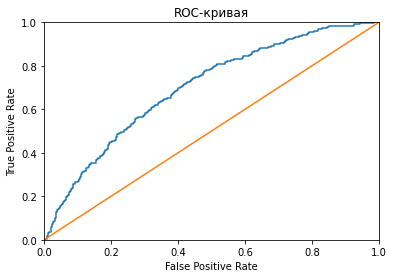

In [70]:
plt.figure()
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
x = np.array([0, 1])
y = np.array([0, 1])
plt.plot(x, y)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()

In [71]:
f1 = {'Дерево решений':0.545, 'Случайный лес':0.627, 'Логистическая регрессия':0.062} 
# Табличца для удобства сравнения. 
f1_df = pd.DataFrame(f1, index =['F1 с дисбалансом']) 
f1_df.head()

,Дерево решений,Случайный лес,Логистическая регрессия
F1 с дисбалансом,0.545,0.627,0.062


Результат f1 уже сейчас сопоставим с необходимым для успешной сдачи проекта. Но мы знаем, что у нас выраженная разница в масштабе классов признаков:

In [72]:
data_ohe.describe()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.000400,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.769588,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


Часть признаков имеет масштаб от 0 до 1, а разброс признаков credit_score, balance, estimated_salary - несопоставим, так estimated_salary от 11 до 199992. 

Помимо этого, есть дисбаланс и в частоте признаков, поэтому в дальнейшем попробуем их сбалансировать с использованием аргумента class_weight.


### Проверка модели после масштабирования признаков

У наших признаков разный масштаб и нужно стандартизировать их. В данных есть столбцы: age,tenure, balance, num_of_product и estimated_salary, в которых данные имеют несопоставимый разброс. Чтобы избежать этой ловушки, при которой одни признаки будут ставиться выше других,их приводят к одному масштабу. Применим стандартизацию данных.

In [73]:
scaler = StandardScaler()
numeric = ['age','credit_score', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.head())

      credit_score       age    tenure   balance  num_of_products  \
2837     -1.040434  0.953312  0.358340  0.774657        -0.914708   
9925      0.454006 -0.095244 -0.366128  1.910540        -0.914708   
8746      0.103585 -0.476537  1.082807  0.481608         0.820981   
660      -0.184996  0.190726 -0.366128  0.088439        -0.914708   
3610     -0.720933  1.620574 -1.452829  0.879129        -0.914708   

      has_cr_card  is_active_member  estimated_salary  geography_Germany  \
2837            0                 1         -0.119110                  1   
9925            1                 1         -0.258658                  0   
8746            0                 1          1.422836                  0   
660             1                 1         -1.160427                  1   
3610            1                 0          0.113236                  0   

      geography_Spain  gender_Male  
2837                0            0  
9925                0            0  
8746             

Ок, а что стало с нашими предсказаниями?

#### Дерево решений

In [74]:
model = DecisionTreeClassifier(random_state=RANDOM_ST)
model.fit(features_train, target_train)

best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 6): 
    model = DecisionTreeClassifier(random_state=RANDOM_ST, max_depth=depth ) # < создаем модель, указав max_depth=depth 
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid) # < находим предсказания на валидационной выборке 
    print("max_depth =", depth, ": ", end='')
    print(f1_score(target_valid, predicted_valid))
    result = f1_score(target_valid, predicted_valid) # считаем значение метрики F1 на валидационной выборке
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth    
print("")
print('Лучшая модель после шага 1:', best_model, "F1 наилучшей модели на валидационной выборке:", best_result, "Максимальная глубина:", best_depth)

max_depth = 1 : 0.0
max_depth = 2 : 0.5203488372093023
max_depth = 3 : 0.5375722543352601
max_depth = 4 : 0.5206349206349208
max_depth = 5 : 0.5454545454545455

Лучшая модель после шага 1: DecisionTreeClassifier(max_depth=5, random_state=12345) F1 наилучшей модели на валидационной выборке: 0.5454545454545455 Максимальная глубина: 5


Лучшая модель - и показатель F1 без изменений, а что покажет нам roc- кривая?

In [75]:
model = DecisionTreeClassifier(random_state=RANDOM_ST, max_depth=5 ) # < создаем модель, указав max_depth=depth 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

In [76]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 


0.849793544930535


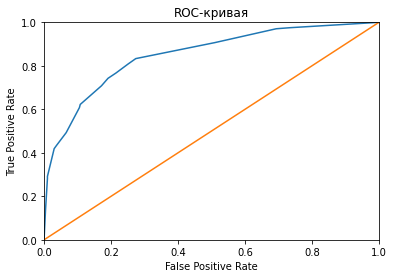

In [77]:
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
x = np.array([0, 1])
y = np.array([0, 1])
plt.plot(x, y)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()

А вот roc-кривая говорит, что мы на верном пути! Плoщадь под кривой увеличилась с 0.819 до 0.849 

#### Случайный лес

Для быстроты проверки я сокращаю широту перебора цикла после предварительного подбора параметров. Подбор производился на большем диапазоне: est in range(50, 401, 10), depth in range (2, 20). 

У нас был  результат F1 наилучшей модели на валидационной выборке 0.5945121951219512 Количество деревьев: 130 Максимальная глубина: 12. Посмотрим, что получится сейчас:

Посше стратификации лучшая модель из шага 2.1.2 была с F1 0.6275659824046922, Количество деревьев: 200 Максимальная глубина: 18 (в одном из циклов - с глубиной 80, но результат не повторялся). Посмотрим, что получится сейчас:

In [78]:
best_model_f = None
best_result_f = 0
best_est_f = 0
best_depth_f = 0
for est in range(160, 201, 10):
    for depth in range (12, 19):
        model = RandomForestClassifier(random_state=RANDOM_ST, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train) 
        predicted_valid = model.predict(features_valid)
        result_f = f1_score(target_valid, predicted_valid) # считаем значение метрики F1 на валидационной выборке
        if result_f > best_result_f:
            best_model_f = model
            best_result_f = result_f
            best_est_f = est
            best_depth_f = depth

print("F1 наилучшей модели на валидационной выборке:", best_result_f, "Количество деревьев:", best_est_f, "Максимальная глубина:", best_depth_f)


F1 наилучшей модели на валидационной выборке: 0.6286549707602339 Количество деревьев: 170 Максимальная глубина: 18


In [79]:
model = RandomForestClassifier(random_state=RANDOM_ST, n_estimators=170, max_depth=18) 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

In [80]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

0.865701824071337


Новые данные:
F1 наилучшей модели на валидационной выборке: 0.6286549707602339 Количество деревьев: 170 Максимальная глубина: 18

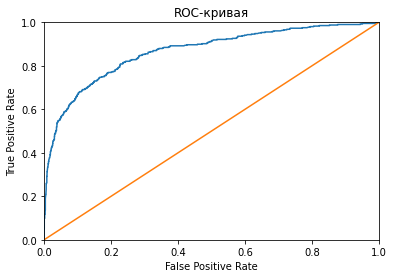

In [81]:
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
x = np.array([0, 1])
y = np.array([0, 1])
plt.plot(x, y)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()

F1 наилучшей модели возросла с 0.627566 до 0.59549 , а вот площадь под кривой тоже увеличилась с 0.84778 до 0.86570. 

После стратификации результат лучше! Теперь F1 наилучшей модели на валидационной выборке: 0.6286, а площадь под кривой до 0.86657! Количество деревьев: 170 Максимальная глубина: 18


Какой показатель важнее, F1 или auc-roc? И стоило ли вообще перевыбирать модель после масштабирования?. Ответа у меня пока нет. 

А как себя показажет предыдущая топ-модель на новых данных?

In [82]:
model = RandomForestClassifier(random_state=RANDOM_ST, n_estimators=130, max_depth=12) 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.6048632218844985

In [83]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

0.8695391787368212


А вот очень даже хорошо она выглядит по показателю площади под кривой. Но в нашем исследовании F1 - основной показатель, и я выбираю для дальнейшей оценки модель с F1 на валидационной выборке 0.6286, количество деревьев: 170 Максимальная глубина: 18

#### Логистическая регрессия

И у нас осталась для прогона логистическая регрессия. С её прошлыми показателями F1 0.08386 и auc-roc- 0.67279, не топ, но что теперь?

In [84]:
model_lr = LogisticRegression(random_state=RANDOM_ST, solver='liblinear', max_iter=1000)
model_lr.fit(features_train, target_train)
predicted_valid = model_lr.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.3076923076923077

In [85]:
probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

0.7874882993398364


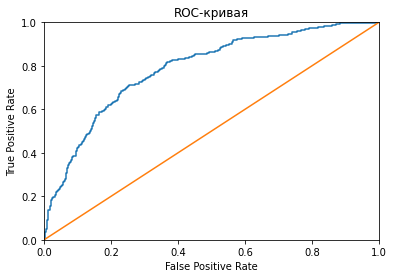

In [86]:
plt.figure()
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
x = np.array([0, 1])
y = np.array([0, 1])
plt.plot(x, y)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()

Ого, как выросли показатели, маленький шаг для человека, и огромный - для модели!!!

In [87]:
f1 = {'F1 "сырая"':[0.545, 0.627, 0.062], 
      'F1 масштаб':[0.545, 0.629, 0.787]}
# Таблица для удобства сравнения. 
f1_df = pd.DataFrame(f1, index =['Дерево решений', 'Случайный лес', 'Логистическая регрессия' ]) 
f1_df.head()

,"F1 ""сырая""",F1 масштаб
Дерево решений,0.545,0.545
Случайный лес,0.627,0.629
Логистическая регрессия,0.062,0.787


Переходим к ликвидации дисбаланса.

**Вывод** Лучшей моделью для следующих шагов и тестирования признана модель случайный лес с гиперпараметрами: количество деревьев - 320 Максимальная глубина - 18.

## Борьба с дисбалансом

Сначала проверим, как справится механизированный метод, что будет, если мы просто воспользуемся параметром class_weight='balanced'?

In [88]:
model = RandomForestClassifier(random_state=RANDOM_ST, n_estimators=170, max_depth=18, class_weight='balanced') 
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
f1_score(target_test, predicted_test)

0.5349922239502332

In [89]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.8659827938713175


F1 0.534. Достаточно для целей данной работы, но мы продолжим.

Посмотрим на дисбаланс целевого признака:

In [90]:
target.value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [91]:
target.sum()/len(target)

0.2037

Целевой признак составляет 1/5 от общего числа признаков и меньше признака 0 примерно в 4 раза. Применим технику upsampling с коэффициентом repeat 4 для устранения дисбаланса

In [92]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


In [93]:
features_up, target_up = upsample( features_train, target_train, 4)


In [94]:
target_up.value_counts()

1    4888
0    4778
Name: exited, dtype: int64

Достигнут почти паритет. Что скажет наша модель, признанная лучшей по итогам шага 2?

In [95]:
model = RandomForestClassifier(random_state=RANDOM_ST, n_estimators=170, max_depth=18) 
model.fit(features_up, target_up)
predicted_valid = model.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.6251621271076524

In [96]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.8655062998817618


Отлично, рост обоих показателей, переходим к тестированию модели.

**Вывод** по результатам подбора методов для борьбы с дисбалансом мы остановились на варианте с данными, сбалансироваными техникой upsampling 

## Тестирование модели

Начинаем тестирование лучшей модели, модель случайный лес с гиперпараметрами: количество деревьев - 170 Максимальная глубина - 18

In [97]:
model = RandomForestClassifier(random_state=RANDOM_ST, n_estimators=170, max_depth=18)# class_weight='balanced') 
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
f1_score(target_test, predicted_test)

0.5484848484848485

In [98]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

0.8505616556464014


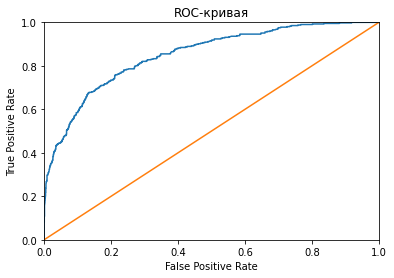

In [99]:
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
x = np.array([0, 1])
y = np.array([0, 1])
plt.plot(x, y)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()

Вот и результат нашего труда по подбору модели. f1 - 0.5484848484848485 , auc-roc - 0.8505616556464014 Но мы немного подсмотрим по другим вариантам, вдруг будет лучший результат на тестовой выборке

In [100]:
model_t = DecisionTreeClassifier(random_state=RANDOM_ST, max_depth=5)
model_t.fit(features_train, target_train)
predicted_test = model_t.predict(features_test)
f1_score(target_test, predicted_test)

0.49087893864013277

In [101]:
probabilities_test = model_t.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

0.8220007372549745


Нет, она по-прежнему в отстающих. А, что если ещё проверить модель из далёкого прошлого, n_estimators=130, max_depth=12?

In [102]:
model = RandomForestClassifier(random_state=RANDOM_ST, n_estimators=130, max_depth=12)#, class_weight='balanced') 
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
f1_score(target_test, predicted_test)

0.546875

In [103]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

0.854316566180973


Немного выше по auc-roc 0.8543.


Ну и наша модель из шага 2.2 -Случайный лес с глубиной 19 и количеством деревьев 350 (отбракованная по подозрению в переобучении):

In [104]:
model = RandomForestClassifier(random_state=RANDOM_ST, n_estimators=350, max_depth=19)# class_weight='balanced') 
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
f1_score(target_test, predicted_test)

0.5474006116207951

In [105]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

0.8505254098474437


Оба показателя хуже, чем у нашего фаворита, по результатам перекрёстных проверок, лидером остаётся модель случайный лес с гиперпараметрами: количество деревьев - 170 Максимальная глубина - 18.

Проверим их на объединенной выборке train+valid, создадим особую базу для обучения, добавив валидационную часть обратно к тестовой. 

In [106]:
features_up_add, target_up_add = upsample(features_valid, target_valid, 4)
features_train = pd.concat([features_up, features_up_add], ignore_index= True)
target_train = pd.concat([target_up, target_up_add], ignore_index= True)
features_train, target_train = shuffle(features_train, target_train, random_state=RANDOM_ST)


In [107]:
model = RandomForestClassifier(random_state=RANDOM_ST, n_estimators=130, max_depth=12)#, class_weight='balanced') 
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
f1_score(target_test, predicted_test)

0.6021003500583432

In [108]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

0.8544908544908545


In [109]:
model = RandomForestClassifier(random_state=RANDOM_ST, n_estimators=170, max_depth=18)#, class_weight='balanced') 
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
f1_score(target_test, predicted_test)

0.5879194630872482

In [110]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

0.8505261810346556


In [111]:
model = RandomForestClassifier(random_state=RANDOM_ST, n_estimators=350, max_depth=19)#, class_weight='balanced') 
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
f1_score(target_test, predicted_test)

0.5798657718120804

In [112]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

0.8505161556009013


**Общий вывод**
Произведена подготовка данных (переименование столбцов, заполнение пропусков в столбце tenure медианой по возрасту, в разбивке по странам). Применен метод прямого кодирования (OHE) для подготовки категориальных строчных признаков. Выполнено масштабирование признаков и выравнивание классов техникой upsampling. Произведен выбор лучшей модели из моделей Дерево решений, Случайный лес и Логистическая регрессия. По результатам валидации лучшей моделью **на объединенных данных** train+valid стала  модель случайный лес с гиперпараметрами: количество деревьев - 130 Максимальная глубина - 12. Она показала следующие характеристики качества  на тестовой выборке: f1 - 0.6021, и по auc-roc 0.8544909.
**На необъединенных данных** лучшей моделью стала модель случайный лес с гиперпараметрами: количество деревьев - 170 Максимальная глубина - 18. Она показала следующие характеристики качества  на тестовой выборке: f1 - 0.5484, и по auc-roc 0.8506.


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*